In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
%matplotlib inline
sns.set(context='paper', style='whitegrid',
        palette='tab10', font='sans-serif',
        font_scale=1.8, color_codes=True,
        rc={'figure.figsize':(16,8)})

In [2]:
dp = {}
dp['0.2'] = pd.read_csv('../outputs/lr_finder/lr_finder_24-04-2021_age_[0-70]_RMS_L_dp0.2.csv')
dp['0.3'] = pd.read_csv('../outputs/lr_finder/lr_finder_24-04-2021_age_[0-70]_RMS_L_dp0.3.csv')
dp['0.4'] = pd.read_csv('../outputs/lr_finder/lr_finder_24-04-2021_age_[0-70]_RMS_L_dp0.4.csv')
dp['0.5'] = pd.read_csv('../outputs/lr_finder/lr_finder_24-04-2021_age_[0-70]_RMS_L_dp0.5.csv')
dp['0.6'] = pd.read_csv('../outputs/lr_finder/lr_finder_24-04-2021_age_[0-70]_RMS_L_dp0.6.csv')

ipykernel_launcher:18: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
LR_finder_LR(10**-4.37.**-4.09)_RMS_0_70


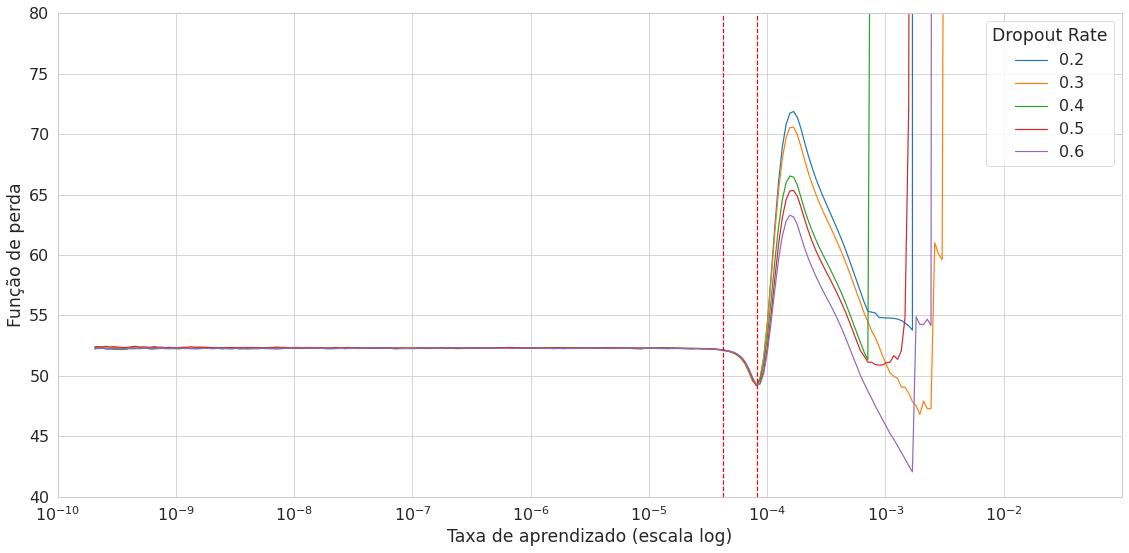

In [17]:
pt = True
# pt = False

min_, max_ = dp['0.6']['lr'].min(), dp['0.6']['lr'].max()
max_ = int(math.log10(max_)) + 1
opt = 'RMS'

lim = {'RMS': [-4.37,-4.09]}

f, ax = plt.subplots()

sns.lineplot(x='lr', y='loss', data=dp['0.2'].iloc[10:], label='0.2')
sns.lineplot(x='lr', y='loss', data=dp['0.3'].iloc[10:], label='0.3')
sns.lineplot(x='lr', y='loss', data=dp['0.4'].iloc[10:], label='0.4')
sns.lineplot(x='lr', y='loss', data=dp['0.5'].iloc[10:], label='0.5')
sns.lineplot(x='lr', y='loss', data=dp['0.6'].iloc[10:], label='0.6')

ax.set_xscale("log", basex=10)
ax.set_xlim(10**-9.9999,10**max_)
ax.set_ylim(40, 80)

if pt:
    ax.set(xlabel='Taxa de aprendizado (escala log)', ylabel='Função de perda')
else:
    ax.set(xlabel='Learning rate (log scale)', ylabel='Loss')
ax.axvline(10**(lim[opt][0]), 0, 130, color='red', linestyle='--')
ax.axvline(10**(lim[opt][1]), 0, 130, color='red', linestyle='--')

plt.xticks([10**x for x in range(-10, max_)])
plt.tight_layout()

legend = plt.legend(title="Dropout Rate",
                    loc='upper right',
                    fancybox=True)

name = "LR_finder_LR(10**"+str(lim[opt][0])+".**"+str(lim[opt][1])+")_"+opt+"_0_70"
print(name)
if pt:
    f.savefig(name+".png")
else:
    f.savefig(name+"_us.png")